In [ ]:
!python -m pip install -q polars
!python -m pip install -q matplotlib
!python -m pip install -q altair

Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [ ]:
# !pip install -q kaggle
# !mkdir -p data/
# !kaggle competitions download -c home-credit-default-risk -p ./.data
# !unzip ./.data/home-credit-default-risk.zip -d ./.data


In [ ]:
import polars as pl
import altair as alt
import matplotlib.pyplot as plt
%matplotlib inline



In [ ]:
df = pl.read_csv("./.data/application_train.csv")

In [ ]:
df.describe()


statistic,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,…,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
str,f64,f64,str,str,str,str,f64,f64,f64,f64,f64,str,str,str,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,f64,f64,f64,str,f64,f64,f64,…,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64
"""count""",307511.0,307511.0,"""307511""","""307511""","""307511""","""307511""",307511.0,307511.0,307511.0,307499.0,307233.0,"""306219""","""307511""","""307511""","""307511""","""307511""",307511.0,307511.0,307511.0,307511.0,307511.0,104582.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,"""211120""",307509.0,307511.0,307511.0,"""307511""",307511.0,307511.0,307511.0,…,137829.0,"""97216""","""153214""",159080.0,"""151170""","""161756""",306490.0,306490.0,306490.0,306490.0,307510.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,307511.0,265992.0,265992.0,265992.0,265992.0,265992.0,265992.0
"""null_count""",0.0,0.0,"""0""","""0""","""0""","""0""",0.0,0.0,0.0,12.0,278.0,"""1292""","""0""","""0""","""0""","""0""",0.0,0.0,0.0,0.0,0.0,202929.0,0.0,0.0,0.0,0.0,0.0,0.0,"""96391""",2.0,0.0,0.0,"""0""",0.0,0.0,0.0,…,169682.0,"""210295""","""154297""",148431.0,"""156341""","""145755""",1021.0,1021.0,1021.0,1021.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,41519.0,41519.0,41519.0,41519.0,41519.0,41519.0
"""mean""",278180.518577,0.080729,null,null,null,null,0.417052,168797.919297,599025.999706,27108.573909,538396.207429,null,null,null,null,null,0.020868,-16036.995067,63815.045904,-4986.120328,-2994.202373,12.061091,0.999997,0.819889,0.199368,0.998133,0.281066,0.05672,null,2.152665,2.052463,2.031521,null,12.063419,0.015144,0.050769,…,0.028236,null,null,0.102547,null,null,1.422245,0.143421,1.405292,0.100049,-962.858788,0.000042,0.710023,0.000081,0.015115,0.088055,0.000192,0.081376,0.003896,0.000023,0.003912,0.000007,0.003525,0.002936,0.00121,0.009928,0.000267,0.00813,0.000595,0.000507,0.000335,0.006402,0.007,0.034362,0.267395,0.265474,1.899974
"""std""",102790.175348,0.272419,null,null,null,null,0.722121,237123.146279,402490.776996,14493.737315,369446.46054,null,null,null,null,null,0.013831,4363.988632,141275.766519,3522.886321,1509.450419,11.944812,0.001803,0.38428,0.399526,0.043164,0.449521,0.231307,null,0.910682,0.509034,0.502737,null,3.265832,0.122126,0.219526,…,0.070166,null,null,0.107462,null,null,2.400989,0.446698,2.379803,0.362291,826.808487,0.006502,0.453752,0.009016,0.12201,0.283376,0.01385,0.273412,0.062295,0.004771,0.062424,0.00255,0.059268,0.05411,0.03476,

In [ ]:
df.head()

SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,NAME_TYPE_SUITE,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,FLAG_MOBIL,FLAG_EMP_PHONE,FLAG_WORK_PHONE,FLAG_CONT_MOBILE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS,REGION_RATING_CLIENT,REGION_RATING_CLIENT_W_CITY,WEEKDAY_APPR_PROCESS_START,HOUR_APPR_PROCESS_START,REG_REGION_NOT_LIVE_REGION,REG_REGION_NOT_WORK_REGION,LIVE_REGION_NOT_WORK_REGION,…,NONLIVINGAREA_MEDI,FONDKAPREMONT_MODE,HOUSETYPE_MODE,TOTALAREA_MODE,WALLSMATERIAL_MODE,EMERGENCYSTATE_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,OBS_60_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,FLAG_DOCUMENT_2,FLAG_DOCUMENT_3,FLAG_DOCUMENT_4,FLAG_DOCUMENT_5,FLAG_DOCUMENT_6,FLAG_DOCUMENT_7,FLAG_DOCUMENT_8,FLAG_DOCUMENT_9,FLAG_DOCUMENT_10,FLAG_DOCUMENT_11,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
i64,i64,str,str,str,str,i64,f64,f64,f64,f64,str,str,str,str,str,f64,i64,i64,f64,i64,f64,i64,i64,i64,i64,i64,i64,str,f64,i64,i64,str,i64,i64,i64,i64,…,f64,str,str,f64,str,str,f64,f64,f64,f64,f64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,i64,f64,f64,f64,f64,f64,f64
100002,1,"""Cash loans""","""M""","""N""","""Y""",0,202500.0,406597.5,24700.5,351000.0,"""Unaccompanied""","""Working""","""Secondary / secondary special""","""Single / not married""","""House / apartment""",0.018801,-9461,-637,-3648.0,-2120,null,1,1,0,1,1,0,"""Laborers""",1.0,2,2,"""WEDNESDAY""",10,0,0,0,…,0.0,"""reg oper account""","""block of flats""",0.0149,"""Stone, brick""","""No""",2.0,2.0,2.0,2.0,-1134.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
100003,0,"""Cash loans""","""F""","""N""","""N""",0,270000.0,1293502.5,35698.5,1.1295e6,"""Family""","""State servant""","""Higher education""","""Married""","""House / apartment""",0.003541,-16765,-1188,-1186.0,-291,null,1,1,0,1,1,0,"""Core staff""",2.0,1,1,"""MONDAY""",11,0,0,0,…,0.01,"""reg oper account""","""block of flats""",0.0714,"""Block""","""No""",1.0,0.0,1.0,0.0,-828.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100004,0,"""Revolving loans""","""M""","""Y""","""Y""",0,67500.0,135000.0,6750.0,135000.0,"""Unaccompanied""","""Working""","""Secondary / secondary special""","""Single / not married""","""House / apartment""",0.010032,-19046,-225,-4260.0,-2531,26.0,1,1,1,1,1,0,"""Laborers""",1.0,2,2,"""MONDAY""",9,0,0,0,…,null,null,null,null,null,null,0.0,0.0,0.0,0.0,-815.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
100006,0,"""Cash loans""","""F""","""N""","""Y""",0,135000.0,312682.5,29686.5,297000.0,"""Unaccompanied""","""Working""","""Secondary / secondary special""","""Civil marriage""","""House / apartment""",0.008019,-19005,-3039,-9833.0,-2437,null,1,1,0,1,0,0,"""Laborers""",2.0,2,2,"""WEDNESDAY""",17,0,0,0,…,null,null,null,null,null,null,2.0,0.0,2.0,0.0,-617.0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,null,null,null,null,null,null
100007,0,"""Cash loans""","""M""","""N""","""Y""",0,121500.0,513000.0,21865.5,513000.0,"""Unaccompanied""","""Working""","""Secondary / secondary special""","""Single / not married""","""House / apartment""",0.028663,-19932,-3038,-4311.0,-3458,null,1,1,0,1,0,0,"""Core staff""",1.0,2,2,"""THURSDAY""",11,0,0,0,…,null,null,null,null,null,null,0.0,0.0,0.0,0.0,-1106.0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
print(df.shape)
print(df.unique().shape)

(307511, 122)
(307511, 122)


In [ ]:
for i in df.columns:
    print(f"{i}: {df[i].null_count()}")

AMT_ANNUITY	enleve
AMT_GOODS_PRICE enleve
NAME_TYPE_SUITE enleve
OWN_CAR_AGE -1
OCCUPATION_TYPE unknown
EXT_SOURCE_1: 173378
CNT_FAM_MEMBERS enleve
NONLIVINGAREA_MEDI ?
FONDKAPREMONT_MODE ?

In [22]:
df = df.with_columns([
    pl.col(col).cast(pl.Categorical) 
    for col in df.columns 
    if df[col].dtype == pl.Utf8
])

In [39]:
columns = ["SK_ID_CURR",
"NAME_CONTRACT_TYPE",
"CODE_GENDER",
"FLAG_OWN_CAR",
"FLAG_OWN_REALTY",
"CNT_CHILDREN",
"AMT_INCOME_TOTAL",
"AMT_CREDIT",
"AMT_ANNUITY",
"AMT_GOODS_PRICE",
"NAME_TYPE_SUITE",
"NAME_INCOME_TYPE",
"NAME_EDUCATION_TYPE",
"NAME_FAMILY_STATUS",
"NAME_HOUSING_TYPE",
"REGION_POPULATION_RELATIVE",
"DAYS_BIRTH",
"DAYS_EMPLOYED",
"DAYS_REGISTRATION",
"DAYS_ID_PUBLISH"]

In [40]:
df = df.select(columns)

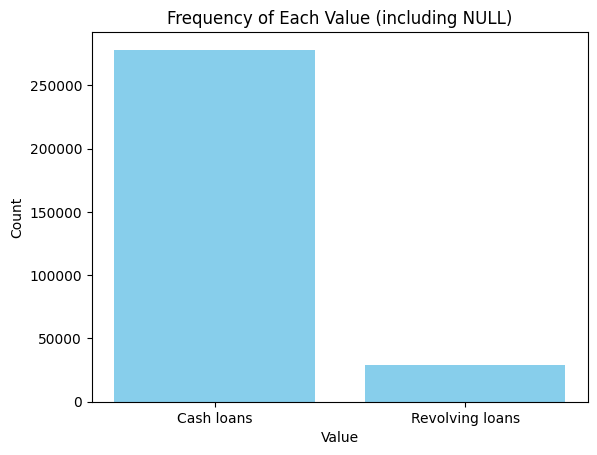

In [ ]:
counts = (
    df
    .group_by("NAME_CONTRACT_TYPE", maintain_order=True)
    .agg(pl.len().alias("count"))
)

plt.bar(counts["NAME_CONTRACT_TYPE"].to_list(), counts["count"].to_list(), color="skyblue")
plt.xlabel("Value")
plt.ylabel("Count")
plt.title("Frequency of Each Value (including NULL)")
plt.show()